In [3]:
# %% [code]
# Environment Setup

import sys
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# Set up the project root (assumes notebooks/ is one level below your project root)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Print and verify the setup.
print("Project Root:", project_root)
print("Torch version:", torch.__version__)


Project Root: /Users/mortezapourjahangiri/PycharmProjects/PythonProject/VAE_GAN_Logistics_Framework
Torch version: 2.7.0


In [4]:
# %% [code]
# Import simulation engine functions and load the trained VAE-GAN model

from simulation.simulation_engine import load_model, generate_synthetic_scenarios

# Define the path to your trained model.
model_path = os.path.join(project_root, "src", "models", "trained_model.pt")
print("Loading model from:", model_path)

# Load the model (ensure input_dim and latent_dim match your training configuration)
model = load_model(model_path, input_dim=5, latent_dim=8)

# Create example input data (you can update these with real or synthetic logistics features)
example_input = np.array([
    [0.5, -0.1, 1.2, 0.3, -0.2],
    [0.8,  0.0, 1.5, 0.4, -0.1],
    [0.6,  0.1, 1.3, 0.2, -0.3],
    [0.7, -0.2, 1.4, 0.5, -0.4]
])

# Generate synthetic scenarios
reconstruction, latent_embedding = generate_synthetic_scenarios(model, example_input)

# Print outputs to verify results
print("Reconstructed Forecasts:")
print(reconstruction)
print("\nLatent Embeddings (shape {}):".format(latent_embedding.shape))
print(latent_embedding)


Loading model from: /Users/mortezapourjahangiri/PycharmProjects/PythonProject/VAE_GAN_Logistics_Framework/src/models/trained_model.pt
Reconstructed Forecasts:
[[-0.06459379 -0.568654    0.3452766  -0.4778052  -0.65296316]
 [-0.01409438 -0.53105277  1.5701809  -0.37248275 -0.70767814]
 [ 0.63536084 -0.42950633  1.1562073  -0.08311191 -0.6968663 ]
 [ 0.04351637 -0.5008653   1.5337522  -0.31345114 -0.690984  ]]

Latent Embeddings (shape (4, 8)):
[[ 0.03258738  0.00647876 -1.176385    0.03268976  0.6197612   0.02060201
   0.29271752 -0.00990963]
 [ 0.0444686   0.01020071 -1.3544382   0.04001758  0.86272824  0.00939393
   0.52036834  0.00382161]
 [ 0.03097608  0.00335397 -1.2210388   0.03500347  0.7147646   0.02420052
   0.28038865 -0.01021762]
 [ 0.03757154  0.00505199 -1.2915199   0.03137615  0.8200749   0.02165824
   0.26454556 -0.01521951]]


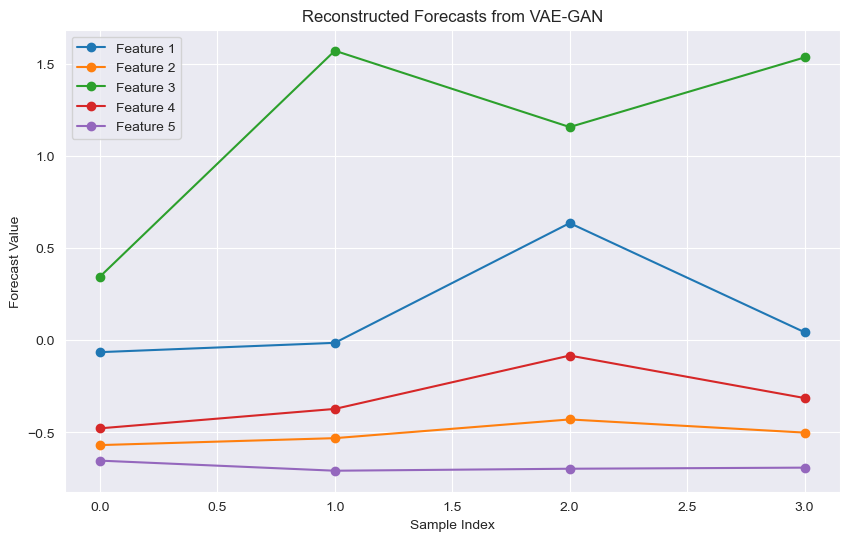

In [5]:
# %% [code]
# Plot the reconstructed forecasts for each feature

plt.figure(figsize=(10, 6))
for i in range(reconstruction.shape[1]):
    plt.plot(reconstruction[:, i], marker='o', linestyle='-', label=f"Feature {i+1}")
plt.title("Reconstructed Forecasts from VAE-GAN")
plt.xlabel("Sample Index")
plt.ylabel("Forecast Value")
plt.legend()
plt.show()


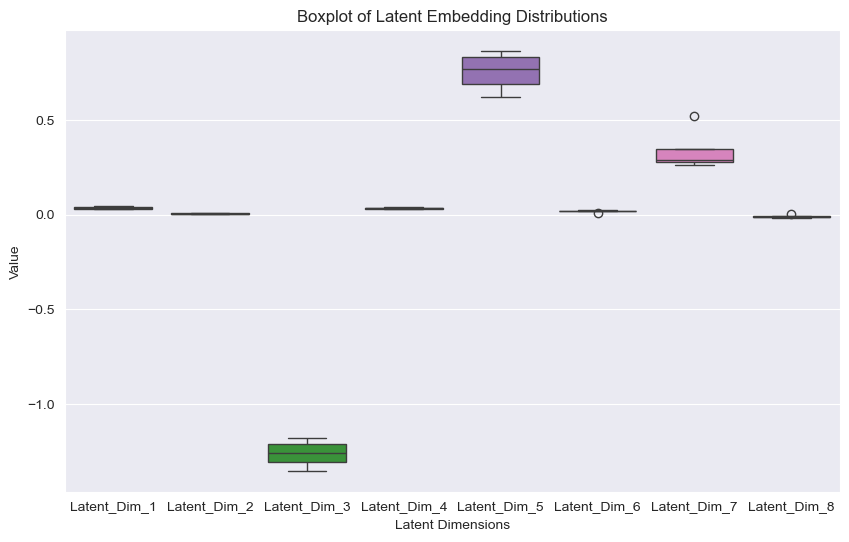

In [6]:
# %% [code]
# Create a boxplot to show the distribution of each latent dimension

# Create a DataFrame from the latent embeddings (assuming latent_embedding is of shape [n_samples, latent_dim])
latent_dim = latent_embedding.shape[1]
latent_df = pd.DataFrame(latent_embedding, columns=[f"Latent_Dim_{i+1}" for i in range(latent_dim)])

plt.figure(figsize=(10, 6))
sns.boxplot(data=latent_df)
plt.title("Boxplot of Latent Embedding Distributions")
plt.xlabel("Latent Dimensions")
plt.ylabel("Value")
plt.show()


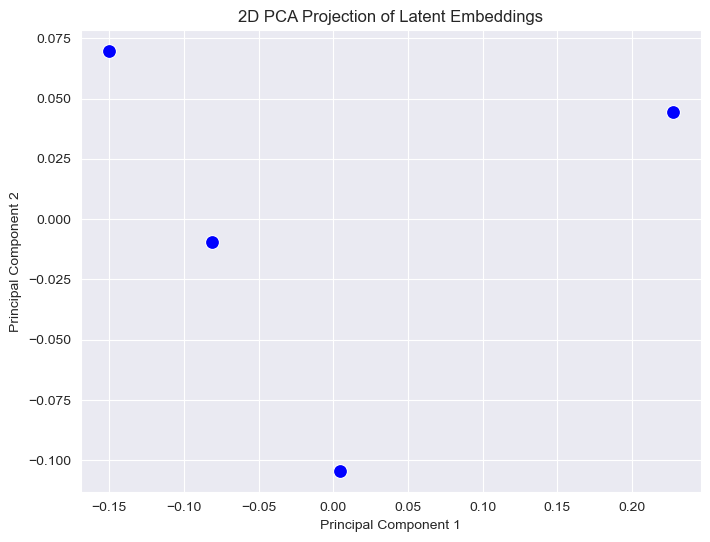

In [7]:
# %% [code]
# Perform PCA to reduce the latent space to 2D and plot a scatter plot.

pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent_embedding)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=latent_2d[:, 0], y=latent_2d[:, 1], s=100, color='blue')
plt.title("2D PCA Projection of Latent Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
